# Summary
In this notebook we construct a combined model, that is expecting a 12-leads ECG readings, first impute their empty values (using the upstream model's weights) and then takes the imputed ECG signal and use it to predict the target(s).  
We do not train anything yet.

# Setup

In [7]:
import os
os.chdir('/home/david/Desktop/projects/thesis/')

In [8]:
import torch

# hyperparams to be changed if needed
downstream_path = './downstream_classification/models/3.0-inception-bs128-balanced-death-lr0.001-decay0-aucpr-weighted33.pt'
upstream_path = './upstream_seq2seq/models/transformer_cnn_1696038569.0264485.pt'
lr,dropout,class_weight,weight_decay = (0.001, 0.2, 50.0, 0.0005)

## upstream

input_dimension          = 12
output_dimension         = 12
hidden_dimmension        = 64
attention_heads          = None
encoder_number_of_layers = 8
dim_feedforward          = 512
kernel_size              = 3
activation               ='gelu'
dropout                  = 0.4
device                   = device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loss_function_weight     = torch.tensor([100]).to(device)
# ---------------

Starting Experiment


training using device: cuda




/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/torch/nn/modules/transformer.py:218: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because  self.layers[0].self_attn.batch_first was not True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


1320081


Within epoch loss (validation) 12.52092: 100%|██████████| 832/832 [01:29<00:00,  9.28it/s]


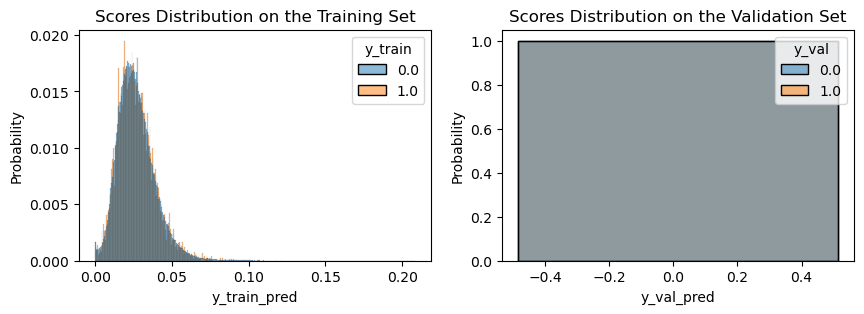

New best validation loss was found, current best valid loss is 12.5209
---------------------------------------------
Epoch: 01 | Time: 12m 29s
	Train Loss: 13.674
	 Val. Loss: 12.521
	 ROC-AUC: 0.500
	 PR-AUC: 0.513
	 TPR for FPR=0.6 Budget: 1.000
	 Best Val. Loss: 12.521
---------------------------------------------


Within epoch loss (validation) 12.32133: 100%|██████████| 832/832 [01:27<00:00,  9.46it/s]


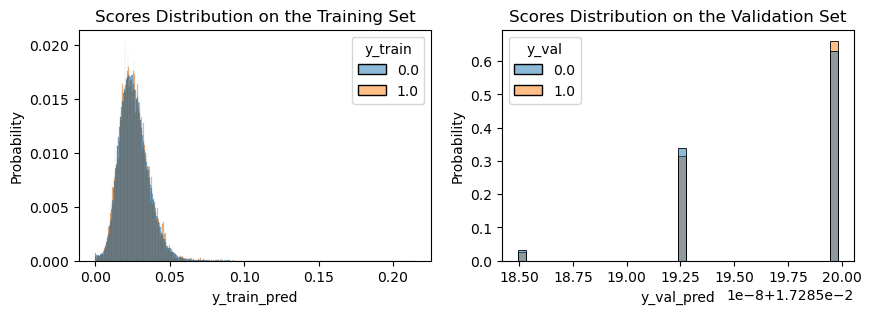

New best validation loss was found, current best valid loss is 12.3213
---------------------------------------------
Epoch: 02 | Time: 13m 57s
	Train Loss: 13.572
	 Val. Loss: 12.321
	 ROC-AUC: 0.517
	 PR-AUC: 0.349
	 TPR for FPR=0.6 Budget: 0.661
	 Best Val. Loss: 12.321
---------------------------------------------


Within epoch loss (validation) 12.12137: 100%|██████████| 832/832 [01:27<00:00,  9.45it/s]


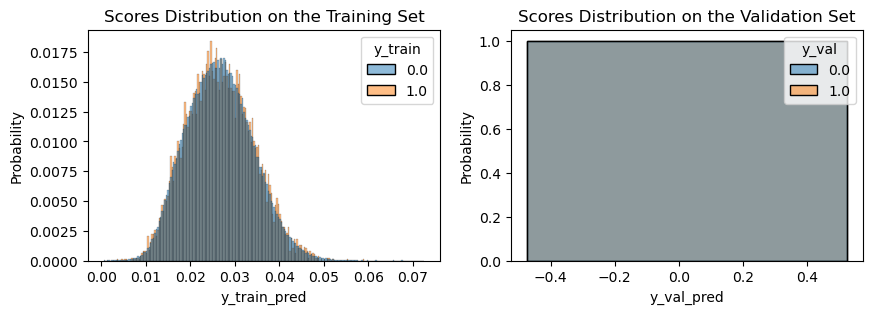

New best validation loss was found, current best valid loss is 12.1214
---------------------------------------------
Epoch: 03 | Time: 14m 6s
	Train Loss: 13.434
	 Val. Loss: 12.121
	 ROC-AUC: 0.500
	 PR-AUC: 0.513
	 TPR for FPR=0.6 Budget: 1.000
	 Best Val. Loss: 12.121
---------------------------------------------


Within epoch loss (training) 13.31503:  60%|█████▉    | 2452/4103 [07:14<04:52,  5.65it/s]


KeyboardInterrupt: 

In [9]:
from combined_downstream_upstram.executors.train_on_local_machine_mps import trainer


config = {
    # general
    'seed': 123,
    'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
    'data_folder_path': './downstream_classification/data/individual-signals/',
    'fillna': -1,
    # training
    'batch_size': 64,
    'n_epochs': 60,
    'clip':1,
    'loss_function_weight':loss_function_weight,
    'targets': ['one_year_until_death'],
    'saving_path': './combined_downstream_upstram/models/comined_model_training',
    'lr': 0.004
}

import os

# run
print('Starting Experiment')
trainer(**config)


In [ ]:
print('finished')